## Data unzip

In [1]:
from zipfile import ZipFile
from pathlib import Path

In [2]:
with ZipFile('project_dataset.zip') as zipped_file:
    zipped_file.extractall(Path.cwd()/'data')

## Data import

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_dev = pd.read_csv(Path.cwd()/'data'/'DSL2122_january_dataset'/'development.csv')
df_eval = pd.read_csv(Path.cwd()/'data'/'DSL2122_january_dataset'/'evaluation.csv')
df = df_dev.append(df_eval)

## Dataset analysis

### General analysis

In [5]:
df_dev.head()

,sentiment,ids,date,flag,user,text
0,1,1833972543,Mon May 18 01:08:27 PDT 2009,NO_QUERY,Killandra,"@MissBianca76 Yes, talking helps a lot.. going..."
1,1,1980318193,Sun May 31 06:23:17 PDT 2009,NO_QUERY,IMlisacowan,SUNSHINE. livingg itttt. imma lie on the grass...
2,1,1994409198,Mon Jun 01 11:52:54 PDT 2009,NO_QUERY,yaseminx3,@PleaseBeMine Something for your iphone
3,0,1824749377,Sun May 17 02:45:34 PDT 2009,NO_QUERY,no_surprises,@GabrielSaporta couldn't get in to the after p...
4,0,2001199113,Tue Jun 02 00:08:07 PDT 2009,NO_QUERY,Rhi_ShortStack,@bradiewebbstack awww is andy being mean again...


In [6]:
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224994 entries, 0 to 224993
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sentiment  224994 non-null  int64 
 1   ids        224994 non-null  int64 
 2   date       224994 non-null  object
 3   flag       224994 non-null  object
 4   user       224994 non-null  object
 5   text       224994 non-null  object
dtypes: int64(2), object(4)
memory usage: 10.3+ MB


In [7]:
df_dev.notna().any()

sentiment    True
ids          True
date         True
flag         True
user         True
text         True
dtype: bool

No column has empty cells

In [8]:
df_dev['sentiment'].value_counts()

1    130157
0     94837
Name: sentiment, dtype: int64

There are more comments classified as positive (130157) than as negative (94837)

### 'Date' analysis

In [9]:
df_dev['date'].head()

0    Mon May 18 01:08:27 PDT 2009
1    Sun May 31 06:23:17 PDT 2009
2    Mon Jun 01 11:52:54 PDT 2009
3    Sun May 17 02:45:34 PDT 2009
4    Tue Jun 02 00:08:07 PDT 2009
Name: date, dtype: object

In [10]:
df_dev['date'].astype('string').str.split(' ').apply(lambda x : x[-2]).value_counts()

PDT    224994
Name: date, dtype: int64

The only timezone in the dataset is PDT

In [11]:
df_dev['date'].astype('string').str.split(' ').apply(lambda x : x[-1]).value_counts()

2009    224994
Name: date, dtype: int64

All tweets are from year 2009

In [12]:
df_dev['date_mod'] = df_dev['date'].\
    astype('string')\
    .str.split(' ')\
    .apply(lambda x : ' '.join([x[i] for i in [1,2,3,5]]))\
    .pipe(pd.to_datetime)

df_eval['date_mod'] = df_dev['date'].\
    astype('string')\
    .str.split(' ')\
    .apply(lambda x : ' '.join([x[i] for i in [1,2,3,5]]))\
    .pipe(pd.to_datetime)

# df_dev[['date','date_mod']]

In [13]:
df_dev['date_mod']

0        2009-05-18 01:08:27
1        2009-05-31 06:23:17
2        2009-06-01 11:52:54
3        2009-05-17 02:45:34
4        2009-06-02 00:08:07
                 ...        
224989   2009-06-20 20:36:48
224990   2009-06-01 01:25:45
224991   2009-06-01 06:38:10
224992   2009-06-19 08:51:56
224993   2009-06-03 06:00:29
Name: date_mod, Length: 224994, dtype: datetime64[ns]

In [14]:
df_dev['date_mod'].min(), df_dev['date_mod'].max()

(Timestamp('2009-04-06 22:19:57'), Timestamp('2009-06-25 10:28:28'))

In [15]:
df_eval['date_mod']

0       2009-05-18 01:08:27
1       2009-05-31 06:23:17
2       2009-06-01 11:52:54
3       2009-05-17 02:45:34
4       2009-06-02 00:08:07
                ...        
74994   2009-05-10 05:43:24
74995   2009-06-06 01:43:47
74996   2009-05-14 00:29:34
74997   2009-04-19 05:48:44
74998   2009-06-01 04:32:25
Name: date_mod, Length: 74999, dtype: datetime64[ns]

In [16]:
df_eval['date_mod'].min(), df_eval['date_mod'].max()

(Timestamp('2009-04-06 22:20:03'), Timestamp('2009-06-25 10:28:28'))

The tweets were written between 2009-04-06 22:19:57 and 2009-06-25 10:28:28

In [17]:
df_dev['date'] = df_dev['date_mod']
df_dev.drop('date_mod',axis=1,inplace=True)

### 'flag' analysis

In [18]:
df_dev['flag'].value_counts()

NO_QUERY    224994
Name: flag, dtype: int64

In [19]:
df_eval['flag'].value_counts()

NO_QUERY    74999
Name: flag, dtype: int64

The unique value for 'flag' is 'NO_QUERY', so this field can be discarded 

In [20]:
df_dev.drop('flag',axis=1,inplace=True)

### 'user' analysis

#### Frequency of positive or negative for user

In [21]:
df_dev['user'].nunique()

10647

In [22]:
df_eval['user'].nunique()

10647

In [23]:
df['user'].nunique()

10647

In [24]:
df['user'].value_counts()

lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
                  ... 
strangetymes        15
bianckikay          15
linalrae            15
iSpunk              15
bdothill            15
Name: user, Length: 10647, dtype: int64

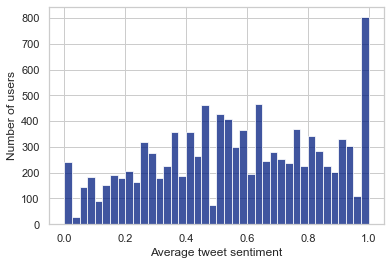

In [66]:
sns.set_theme()
sns.set_style('whitegrid')
sns.set_palette('dark')
average_user_sentiment = df_dev.groupby('user')['sentiment'].mean()
g = sns.histplot(data=average_user_sentiment, bins=40)
g.set_xlabel('Average tweet sentiment')
g.set_ylabel('Number of users')
average_user_sentiment
plt.savefig(Path.cwd()/'Report'/'DSL-report'/'images'/'average_user_sentiment.png', dpi = 200)

There are many users that made almost all tweets classified as positive

#### Tweet for 'user'

In [19]:
df_dev['user'].value_counts().head(30)

lost_dog           412
webwoke            259
tweetpet           232
SallytheShizzle    211
VioletsCRUK        209
mcraddictal        207
tsarnick           186
what_bugs_u        184
Karen230683        178
DarkPiano          177
SongoftheOss       170
Jayme1988          169
keza34             164
ramdomthoughts     162
shanajaca          160
wowlew             159
TraceyHewins       158
nuttychris         158
thisgoeshere       155
Spidersamm         154
StDAY              151
felicityfuller     146
Dogbook            144
_magic8ball        142
Djalfy             136
torilovesbradie    136
Dutchrudder        136
twebbstack         135
Quimo              135
Broooooke_         134
Name: user, dtype: int64

There are 10647 distinct users

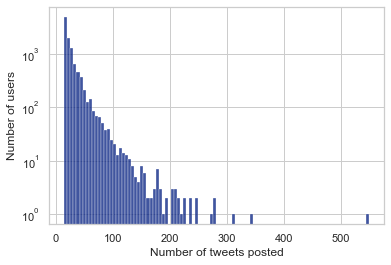

In [58]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
sns.set_theme()
sns.set_style('whitegrid')
sns.set_palette('dark')
# style.use('seaborn-whitegrid')
# fig, ax = plt.subplots(figsize=(15,5))
user_value_counts = pd.DataFrame(df['user'].value_counts()).reset_index()
# sns.barplot(data=user_value_counts, x='index', y='user')

user_value_counts = df['user'].value_counts()
g = sns.histplot(data=user_value_counts, bins=100)
g.set_yscale('log')
g.set_xlabel('Number of tweets posted')
g.set_ylabel('Number of users')
user_value_counts
plt.savefig(Path.cwd()/'Report'/'DSL-report'/'images'/'user_per_tweet.png', dpi = 200)


A few users made many more tweets than others

#### Main "twetterers" analysis

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

countvect = CountVectorizer()

X_count = countvect.fit_transform(df['text'])

from sklearn.metrics.pairwise import cosine_similarity

user_similarity = {}
for user in df['user'].unique():
    X_count_user = X_count[df['user'] == user,:]
    X_similarity_user = cosine_similarity(X_count_user)
    np.fill_diagonal(X_similarity_user,np.nan)
    user_similarity[user] = np.nanmean(X_similarity_user)

user_similarity = pd.Series(user_similarity)
user_similarity

Killandra         0.073697
IMlisacowan       0.053146
yaseminx3         0.051634
no_surprises      0.041548
Rhi_ShortStack    0.039583
                    ...   
sanasaleem        0.042040
skweeds           0.071574
samozzy           0.069901
hEATHER_nVA       0.067190
Rokkster          0.047421
Length: 10647, dtype: float64

In [68]:
user_similarity.to_csv('internal_similarity_users.csv', )

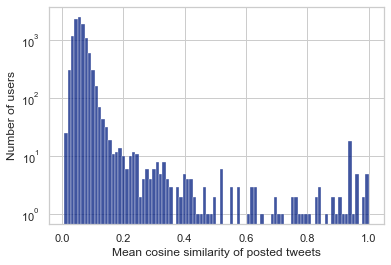

In [76]:
# user_similarity = pd.read_csv('internal_similarity_users.csv')

g = sns.histplot(data=user_similarity, bins=90)
g.set_yscale('log')
g.set_xlabel('Mean cosine similarity of posted tweets')
g.set_ylabel('Number of users')
plt.savefig(Path.cwd()/'Report'/'DSL-report'/'images'/'internal_similarity_users.png', dpi = 200)

In [136]:
user_similarity.sort_values(ascending=False)[100:120]

BecReedman       0.395609
Kyle270          0.388842
chlon2005        0.385649
isdown           0.379656
Twitilicious     0.375937
tns_fan          0.373911
TimmyGrunt       0.360351
iwishiwas        0.358073
SusanCosmos      0.352087
momspark         0.345954
LunaCafe         0.345529
khrystar         0.340303
TakeAWish        0.338444
ThatsTwit        0.337704
RandomPenguin    0.337658
ChupaCabras69    0.337178
marianaguidil    0.334181
jovlynlouise     0.333932
WHEREonPre       0.331830
MariamSales      0.331659
dtype: float64

In [137]:
user = 'MariamSales'
df.loc[df['user']==user]['text']

689       1 exam done...went ok - headache=MASSIVE OW  h...
25527     loves her Liberty print bunny her mummy got he...
49168     halfway through reading dissertation through.....
56806     one hour late-bad plumbers  http://tinyurl.com...
59270     is going home tomorrow  http://tinyurl.com/r5rz9z
67903     halfway through reading dissertation through.....
76299     carrots and hummous mmmmmmm  http://tinyurl.co...
91763      ah pubmed...so useful  http://tinyurl.com/rywqpp
93111       is off to meet Vicky  http://tinyurl.com/ccmmsv
117555    one hour late-bad plumbers  http://tinyurl.com...
194778     ah pubmed...so useful  http://tinyurl.com/rywqpp
27191     word count 2500/3000....SO CLOSE  http://tinyu...
27248     1 exam done...went ok - headache=MASSIVE OW  h...
27751     hates this stupid dissertation and can't do it...
61204     one hour late-bad plumbers  http://tinyurl.com...
Name: text, dtype: object

1. 'lost_dog'

In [20]:
df_dev[df_dev['user'] == 'lost_dog'].head()

,sentiment,ids,date,user,text
30,0,1686517168,2009-05-03 05:45:51,lost_dog,@bthenextstep I am lost. Please help me find a...
580,0,2322687735,2009-06-24 23:04:36,lost_dog,@marissa_in_cali I am lost. Please help me fin...
785,0,1984183693,2009-05-31 14:36:16,lost_dog,@that_much I am lost. Please help me find a go...
1536,0,1975991079,2009-05-30 16:20:57,lost_dog,@dcunited I am lost. Please help me find a goo...
1546,0,2220606046,2009-06-18 03:30:50,lost_dog,@aiimee_x I am lost. Please help me find a goo...


All the tweets made by 'lost_dog' follow the same pattern

In [21]:
df_dev[df_dev['user'] == 'lost_dog']['sentiment'].value_counts()

0    412
Name: sentiment, dtype: int64

All its tweets are classified as negative

2. 'webwoke'

In [22]:
print(df_dev[df_dev['user'] == 'webwoke'].loc[df_dev['text'].str.contains('drop')]['sentiment'].value_counts())
print(df_dev[df_dev['user'] == 'webwoke'].loc[df_dev['text'].str.contains('move up')]['sentiment'].value_counts())

0    196
Name: sentiment, dtype: int64
1    63
Name: sentiment, dtype: int64


All the the tweets made by 'webwoke' follow the same pattern; if the tweet contains the word 'drop', it is classified as negative, instead if it contains the expression 'move up' it is classified as positive

3. 'tweetpet'

In [23]:
print(df_dev[df_dev['user'] == 'tweetpet']['text'].str.contains('Clean Me').any())
print(df_dev[df_dev['user'] == 'tweetpet']['sentiment'].value_counts())

True
0    232
Name: sentiment, dtype: int64


All the tweets made by 'tweetpet' follow the same pattern, and contain 'Clean Me' as text.  
All the tweets are classified as positive.

4. SallytheShizzle

In [24]:
df_dev[df_dev['user'] == 'SallytheShizzle'].head()

,sentiment,ids,date,user,text
485,0,1956695119,2009-05-28 22:27:44,SallytheShizzle,@ColorMeKelly -sigh- we won't get to hear for ...
509,0,2015645364,2009-06-03 05:11:07,SallytheShizzle,@OfficialAS oh well. It's not the hol house t...
2130,1,2015042588,2009-06-03 03:31:13,SallytheShizzle,@MAGGIECHICKEN meh same diff. Just still with ...
2522,0,1988723315,2009-05-31 23:11:16,SallytheShizzle,@OfficialAS sorry I've been TRYING to finish ...
2894,1,2049858625,2009-06-05 17:37:39,SallytheShizzle,#kevinjonas is the best! happy #kevinjonas day!


The first three users by number of tweets seem to be bots, while this one doesn't. I'll stop here this punctual analysis.  
These users may be dropped during the preprocessing

5. StDAY

In [28]:
df_dev[df_dev['user'] == 'Spidersamm'].head()

,sentiment,ids,date,user,text
994,0,2237802529,2009-06-19 06:23:00,Spidersamm,rrrrrrrr im going to bed cos im annoyed now
1717,0,1966109943,2009-05-29 17:08:33,Spidersamm,"@staaceeyy weeooow, i feel fat.... i remember ..."
2466,0,2175595270,2009-06-15 01:26:07,Spidersamm,"heart burn thanks chicken strips, hahah"
3483,0,1956856143,2009-05-28 22:52:00,Spidersamm,@leonblair i wanna be there damn for living ...
3847,1,1693789441,2009-05-03 23:47:20,Spidersamm,@HelloLizzi om nom nom he looks so adorable


### 'text' analysis

## Baseline model

This model is created using sklearn's TfidfVectorizer

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words="english",  
    binary=True, 
    use_idf=True, 
    norm='l2',
    smooth_idf=True
)

wpm = vectorizer.fit_transform(df_dev['text'])

In [26]:
N = 100

word_freq = pd.Series(
    data = np.asarray(wpm.sum(axis=0)).squeeze(),
    index = vectorizer.get_feature_names_out()
).sort_values(ascending=False)

word_freq = word_freq[:N]

# fig, ax = plt.subplots(figsize=(15,5))
# sns.histplot(data=pd.DataFrame(word_freq,columns=['word_freq']),x='word_freq')
# word_freq

In [27]:
word_ind = [w in word_freq.index for w in vectorizer.get_feature_names_out()]

words_df = pd.DataFrame(
    data = wpm[:,word_ind].toarray(),
    columns = vectorizer.get_feature_names_out()[word_ind],
    index = df_dev.index
).add_prefix('word_')

# words_df

In [28]:
from sklearn.model_selection import train_test_split

X = words_df.values
y = df_dev['sentiment'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y, train_size=0.7, random_state=50)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

reg = RandomForestClassifier(100, random_state=42, n_jobs=-2)
reg.fit(X_train, y_train)
f1_score(y_test, reg.predict(X_test))

0.7088160731632195

### Baseline: best RandomForestClassifier hyperparameters

In [30]:
from sklearn.model_selection import GridSearchCV
# param_grid = {
#     "n_estimators": [50,75,100],
#     "criterion": ["gini", "entropy"],
#     "max_features": ["auto", "sqrt", "log2"],
#     "random_state": [42],
#     "n_jobs": [-1],
# }

param_grid = {
    "n_estimators": [50,75],
    "criterion": ["entropy"],
    "max_features": ["auto"],
    "random_state": [42],
    "n_jobs": [-2],
}

gs = GridSearchCV(
    RandomForestClassifier(), 
    param_grid, 
    scoring="f1_macro", 
    # n_jobs=-1, 
    cv=5,
    verbose=3
)
# gs.fit(X, y)

# print(gs.best_score_)
# print(gs.best_estimator_)
# print(gs.best_params_)

### Combinations of hyperparameters

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words="english",  
    binary=True, 
    use_idf=True, 
    norm='l2',
    smooth_idf=True
)

wpm = vectorizer.fit_transform(df_dev['text'])

### Preprocessing: removal of '@words' in 'text'

In [32]:
df_dev_noAt = df_dev.copy()
df_dev_noAt['text'] = df_dev['text'].str.split().apply(lambda x : ' '.join([i for i in x if not(i.startswith('@'))]))

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words="english",  
    binary=True, 
    use_idf=True, 
    norm='l2',
    smooth_idf=True
)

wpm = vectorizer.fit_transform(df_dev_noAt['text'])

In [34]:
N = 100

word_freq = pd.Series(
    data = np.asarray(wpm.sum(axis=0)).squeeze(),
    index = vectorizer.get_feature_names_out()
).sort_values(ascending=False)

word_freq = word_freq[:N]

# fig, ax = plt.subplots(figsize=(15,5))
# sns.histplot(data=pd.DataFrame(word_freq,columns=['word_freq']),x='word_freq')
# word_freq

In [35]:
word_ind = [w in word_freq.index for w in vectorizer.get_feature_names_out()]

words_df = pd.DataFrame(
    data = wpm[:,word_ind].toarray(),
    columns = vectorizer.get_feature_names_out()[word_ind],
    index = df_dev.index
).add_prefix('word_')

# words_df

In [36]:
from sklearn.model_selection import train_test_split

X = words_df.values
y = df_dev['sentiment'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y, train_size=0.7, random_state=50)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

reg = RandomForestClassifier(100, random_state=42, n_jobs=-2)
reg.fit(X_train, y_train)
f1_score(y_test, reg.predict(X_test))

0.7107991667455733

The result does not change, the words are the same. It may have some consequences if we apply stemming and lemmatization

## Test: NLTK

In [135]:
from nltk.sentiment import SentimentAnalyzer
import nltk.sentiment.util as nsu
from nltk.classify import NaiveBayesClassifier

nltk_test = df_dev.copy()
nltk_test['text'] = nltk_test['text'].str.split().apply(lambda x : [i for i in x if not(i.startswith('@'))])

X = nltk_test['text'].values
y = nltk_test['sentiment'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y, train_size=0.7, random_state=50)


nltk_sa = SentimentAnalyzer()

X_train_mod = nltk_sa.all_words([nsu.mark_negation(doc,shallow=True) for doc in X_train])

In [136]:
unigram_feats = nltk_sa.unigram_word_feats(X_train_mod, top_n=150)

nltk_sa.add_feat_extractor(nsu.extract_unigram_feats, unigrams=unigram_feats)

In [152]:
training_set = nltk_sa.apply_features(tuple([(x_t, y_t) for (x_t, y_t) in zip(X_train,y_train)]), labeled=True)
test_set = nltk_sa.apply_features(tuple([(x_t, y_t) for (x_t, y_t) in zip(X_test,y_test)]), labeled=True)

In [154]:
trainer = NaiveBayesClassifier.train

classifier = nltk_sa.train(trainer, training_set)

Training classifier


In [155]:
for key,value in sorted(nltk_sa.evaluate(test_set).items()):
    print(f'{key}: {value}')

Evaluating NaiveBayesClassifier results...
Accuracy: 0.6568689906517133
F-measure [0]: 0.4656838996931737
F-measure [1]: 0.7472913552498064
Precision [0]: 0.6775644468313641
Precision [1]: 0.6510084976142045
Recall [0]: 0.35475027239815826
Recall [1]: 0.8769975414874002
